#(LSTM) Pre-Trained Word Embedding Word2Vec

###Reference
data representation techniques (Tokenizer() class, Word2Vec and GloVe embedding): 'Deep Learning with Python' by Francois Chollet, 'Implement neural networks with Keras on Theano and TensorFlow' by Sujit Pal et al. 

spam detection example: https://towardsdatascience.com/nlp-spam-detection-in-sms-text-data-using-deep-learning-b8632db85cc8

recurrent layers: https://keras.io/api/layers/recurrent_layers/

###Mounting to Google Drive

In [ ]:
#connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import Libraries

In [ ]:
# import libraries
import pandas as pd
import gensim
import nltk
nltk.download('punkt')
import os
import numpy as np
import tensorflow as tf
from keras.constraints import max_norm

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense, Dropout, Flatten, SimpleRNN
from keras.initializers import Constant
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import classification_report
import seaborn as sns


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


####Load the Dataset


In [ ]:
#load the dataset - change the file path 
data=pd.read_csv("/content/gdrive/MyDrive/Depression Project/DepressionDataFinal2Processed.csv")
data = data.astype(str)
data["Target"] = data["Target"].astype(str).astype(int)
data.head()

,Id,Text,Target
0,2.85e+17,one thing love life mother one ever come mine,1
1,2.9e+17,want perfect want happy,0
2,2.86e+17,mom hates dad hates today sucks fword life tho,0
3,2.86e+17,hate hate life,0
4,2.86e+17,feel good,1


In [ ]:
data.columns

Index(['Id', 'Text', 'Target'], dtype='object')

### Train, Val, Test split --> 60%, 20%, 20% 

In [ ]:
# train, val, test split --> 60%, 20%, 20% 
# x_train is the training data set
# y_test is the corresponding labels to x_train 
# x_test is the test dataset 
# y_test is the corresponding label to x_test 
x_train, x_test, y_train, y_test = train_test_split(data, data.Target, test_size=0.2, random_state=1)
# # 0.25 x 0.8 = 0.2
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

### Constants

In [ ]:
max_len = 20
EMBEDDING_DIM = 100

### Tokenize tweets using Tokenizer()

In [ ]:
# Tokenizer API used to encode each word as a number 
vect = Tokenizer()
total_reviews = x_train + x_test + x_val
vect.fit_on_texts(total_reviews)

### Turn the Vectorized Tokens into Sequences of Integers


In [ ]:
encoded_docs_train = vect.texts_to_sequences(x_train)
encoded_docs_test = vect.texts_to_sequences(x_test)
encoded_docs_val = vect.texts_to_sequences(x_val)

### Padding and Making all the Sequences the same Length

In [ ]:
# pad sequence
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_len, padding="post")
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_len, padding="post")
padded_docs_cv = pad_sequences(encoded_docs_val, maxlen=max_len, padding="post")

### Find number of tokens in List

In [ ]:
# add tokens in text column in a list 
# find number of tokens in list
review_lines = list()
lines = data["Text"].values.tolist()
for line in lines:
  tokens = word_tokenize(line)
  review_lines.append(tokens)

In [ ]:
  len(review_lines)

8815

### Train Word2Vec model on the vocabulary 

In [ ]:
# sequence - list of tweets 
# size = size of vector/ dimension 
# min_count - words greater than mincount included in model
# workers - no of threads in training parallelisation 
model = gensim.models.Word2Vec(sentences=review_lines, size = EMBEDDING_DIM, window = 5, workers = 4, min_count=1)

In [ ]:
words = list(model.wv.vocab)
print(words)

['one', 'thing', 'love', 'life', 'mother', 'ever', 'come', 'mine', 'want', 'perfect', 'happy', 'mom', 'hates', 'dad', 'today', 'sucks', 'fword', 'tho', 'hate', 'feel', 'good', '“', 'single', 'tf', 'live', 'pappichulo', '2013', 'spoiled', 'believe', 'reality', 'i', 'blessed', '15factsaboutme', 'wish', 'could', 'go', 'back', 'ti', 'ame', 'change', 'best', 'year', '6', 'disappointment', 'memories', 'sword', 'must', 'say', '♡', 'make', 'suck', 'stop', 'every', 'mywishin2013', 'stay', 'way', 'better', 'last', 'someone', 'care', 'real', 'friends', 'dreams', 'true', 'everything', 'great', 'idk', 'quite', 'even', 'theres', 'ups', 'n', 'downs', 'flat', 'tired', 'sad', 'content', 'try', 'others', 'kid', 'like', 'someti', 'amesi', 'think', 'peoples', 'wonder', 'bring', 'nothing', 'blessing', 'chance', 'family', 'girl', 'thoughtsinthehallway', 'face', 'awesome', 'fabulous', 'loving', 'boy', 'np', 'middle', 'nowhere', 'dont', 'much', 'never', 'wanted', 'nothin', 'still', 'damn', 'amp', 'keeps', 'la

In [ ]:
model.wv.most_similar('hate')

[('sucks', 0.9998611211776733),
 ('new', 0.9998480081558228),
 ('everything', 0.9998472332954407),
 ('happy', 0.9998310804367065),
 ('make', 0.99982750415802),
 ('great', 0.9998271465301514),
 ('know', 0.9998264908790588),
 ('depressed', 0.9998250007629395),
 ('things', 0.9998231530189514),
 ('live', 0.9998229742050171)]

In [ ]:
# save model 
filename = '/content/gdrive/MyDrive/Depression Project/embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
embedding_index = {}
f = open(os.path.join('', '/content/gdrive/MyDrive/Depression Project/embedding_word2vec.txt'), encoding = "utf-8")
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embedding_index[word] = coefs
f.close()

### Tokenize, Vectorize, turn it into sequence and Pad again


In [ ]:
# vectorise tweets 
vect = Tokenizer()
vect.fit_on_texts(review_lines)
sequences = vect.texts_to_sequences(review_lines)

In [ ]:
word_index = vect.word_index
print (len(word_index))

1982


In [ ]:
# pad sequence 
review_pad = pad_sequences(sequences, maxlen = max_len)
sentiment = data["Target"].values

In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embedding_index.get(word)
  # words not found in embedding index will be 0 
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
print(num_words)

1983


### Build and compile DL Model

In [ ]:
model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, input_length= max_len, weights = [embedding_matrix])
# Configuring the parameters
model.add(embedding_layer)
model.add(layers.LSTM(45))
model.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           198300    
_________________________________________________________________
lstm (LSTM)                  (None, 45)                26280     
_________________________________________________________________
dropout (Dropout)            (None, 45)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 46        
Total params: 224,626
Trainable params: 224,626
Non-trainable params: 0
_________________________________________________________________


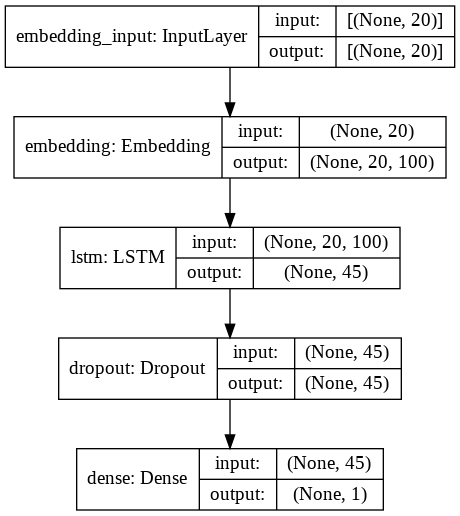

In [ ]:
# plot NN model 
plot_model(model, to_file='/content/gdrive/MyDrive/Depression Project/mlp-mnist.png', show_shapes=True)

### Split Validation Dataset

In [ ]:
validation_split = 0.2 
indices = np.arange(review_pad.shape[0])
print(np.random.shuffle(indices))
review_pad = review_pad[indices]
sentiment = sentiment[indices]
num_validation_samples = int(validation_split * review_pad.shape[0])
print(num_validation_samples)

None
1763


In [ ]:
padded_docs_train = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
padded_docs_cv = padded_docs_train[-num_validation_samples:]
y_val = y_train[-num_validation_samples:]
padded_docs_test = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded_docs_train, y_train,
                    epochs=50,
                    validation_data = (padded_docs_cv, y_val)
                    )

Epoch 1/50
221/221 [==============================] - 6s 19ms/step - loss: 0.6082 - accuracy: 0.6460 - val_loss: 0.1901 - val_accuracy: 0.9331
Epoch 2/50
221/221 [==============================] - 3s 15ms/step - loss: 0.2139 - accuracy: 0.9249 - val_loss: 0.1360 - val_accuracy: 0.9455
Epoch 3/50
221/221 [==============================] - 3s 15ms/step - loss: 0.1677 - accuracy: 0.9430 - val_loss: 0.1057 - val_accuracy: 0.9620
Epoch 4/50
221/221 [==============================] - 3s 15ms/step - loss: 0.1541 - accuracy: 0.9504 - val_loss: 0.0869 - val_accuracy: 0.9694
Epoch 5/50
221/221 [==============================] - 3s 15ms/step - loss: 0.1331 - accuracy: 0.9557 - val_loss: 0.0860 - val_accuracy: 0.9728
Epoch 6/50
221/221 [==============================] - 3s 16ms/step - loss: 0.1094 - accuracy: 0.9637 - val_loss: 0.0823 - val_accuracy: 0.9688
Epoch 7/50
221/221 [==============================] - 3s 15ms/step - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0.0729 - val_accuracy: 0.9711

### Evaluate the Model


In [ ]:
model.evaluate(padded_docs_test, y_test)

56/56 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.9246


[0.4369952380657196, 0.9245604276657104]

In [ ]:
x_test.head()

,Id,Text,Target
2143,2.9e+17,social life,0
2181,2.9e+17,good friends,1
4425,2.85e+17,listening love cause hate life,0
2577,2.9e+17,love never gets bored,1
2213,2.9e+17,best boyfriend ever,1


In [ ]:
pred = model.predict_classes(padded_docs_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
text = x_test["Text"]
#pred = np.argmax(pred, axis = 1)

In [ ]:
for i in range(1763):
  print("Text: ",x_test["Text"].iloc[i], "-->", "Actual Label: ", x_test["Target"].iloc[i], "-->", "Predicted: ", pred[i])

Text:  social life --> Actual Label:  0 --> Predicted:  [0]
Text:  good friends --> Actual Label:  1 --> Predicted:  [1]
Text:  listening love cause hate life --> Actual Label:  0 --> Predicted:  [1]
Text:  love never gets bored --> Actual Label:  1 --> Predicted:  [0]
Text:  best boyfriend ever --> Actual Label:  1 --> Predicted:  [1]
Text:  wow suck --> Actual Label:  0 --> Predicted:  [1]
Text:  life series unfounate fworded events --> Actual Label:  0 --> Predicted:  [0]
Text:  god bless --> Actual Label:  1 --> Predicted:  [0]
Text:  yes i sad --> Actual Label:  0 --> Predicted:  [1]
Text:  i ame life i loving every single moment --> Actual Label:  1 --> Predicted:  [1]
Text:  i feeling great --> Actual Label:  1 --> Predicted:  [1]
Text:  i made like worst mistakes ever --> Actual Label:  0 --> Predicted:  [0]
Text:  love life --> Actual Label:  1 --> Predicted:  [1]
Text:  fword life --> Actual Label:  0 --> Predicted:  [0]
Text:  new resolution drink life fword terrible --> Act

### Predict on Unseen Data 

In [ ]:
nd1 = ["i am the happiest person in this world"]
nd2 = ['i am excited']
nd3 = ['i would not change the past if I could']
nd4 = ['i get everything i want']
nd5 = ['everyday of my life is a celebration']
nd6 = ['my life is blessed']
nd7 = ['i feel complete']
nd8 = ['thank you god']
nd9 = ['i love my family']
nd10 = ['i am in a great mood']
nd11 = ['i never feel sad']   
nd12 = ['i hate chocolate']         

nd1pad = vect.texts_to_sequences(nd1)
nd1pad = pad_sequences(nd1pad, maxlen=9, padding='post')
prednd1 = model.predict_classes(nd1pad).item()
#prednd1a = (model.predict(nd1pad) > 0.5).astype("int32")
#prednd1c = np.argmax(prednd1)
#print(prednd1a, prednd1b, prednd1c)


nd2pad = vect.texts_to_sequences(nd2)
nd2pad = pad_sequences(nd2pad, maxlen=3, padding='post')
prednd2 = model.predict_classes(nd2pad).item()


nd3pad = vect.texts_to_sequences(nd3)
nd3pad = pad_sequences(nd3pad, maxlen=9, padding='post')
prednd3 = model.predict_classes(nd3pad).item()

nd4pad = vect.texts_to_sequences(nd4)
nd4pad = pad_sequences(nd4pad, maxlen=5, padding='post')
prednd4 = model.predict_classes(nd4pad).item()

nd5pad = vect.texts_to_sequences(nd5)
nd5pad = pad_sequences(nd5pad, maxlen=7, padding='post')
prednd5 = model.predict_classes(nd5pad).item()

nd6pad = vect.texts_to_sequences(nd6)
nd6pad = pad_sequences(nd6pad, maxlen=4, padding='post')
prednd6 = model.predict_classes(nd6pad).item()


nd7pad = vect.texts_to_sequences(nd7)
nd7pad = pad_sequences(nd7pad, maxlen=3, padding='post')
prednd7 = model.predict_classes(nd7pad).item()

nd8pad = vect.texts_to_sequences(nd8)
nd8pad = pad_sequences(nd8pad, maxlen=3, padding='post')
prednd8 = model.predict_classes(nd8pad).item()

nd9pad = vect.texts_to_sequences(nd9)
nd9pad = pad_sequences(nd9pad, maxlen=4, padding='post')
prednd9 = model.predict_classes(nd9pad).item()

nd10pad = vect.texts_to_sequences(nd10)
nd10pad = pad_sequences(nd10pad, maxlen=8, padding='post')
prednd10 = model.predict_classes(nd10pad).item()

nd11pad = vect.texts_to_sequences(nd11)
nd11pad = pad_sequences(nd11pad, maxlen=4, padding='post')
prednd11 = model.predict_classes(nd11pad).item()

nd12pad = vect.texts_to_sequences(nd12)
nd12pad = pad_sequences(nd12pad, maxlen=3, padding='post')
prednd12 = model.predict_classes(nd12pad).item()
#prednd12 = (model.predict(nd12pad) > 0.5).astype("int32")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Text: ",nd1, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd1)
print("Text: ",nd2, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd2)
print("Text: ",nd3, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd3)
print("Text: ",nd4, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd4)
print("Text: ",nd5, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd5)
print("Text: ",nd6, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd6)
print("Text: ",nd7, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd7)
print("Text: ",nd8, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd8)
print("Text: ",nd9, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd9)
print("Text: ",nd10, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd10)
print("Text: ",nd11, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd11)
print("Text: ",nd12, "-->", "Actual Label: ", "1", "-->", "Predicted: ", prednd12)

Text:  ['i am the happiest person in this world'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i am excited'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i would not change the past if I could'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i get everything i want'] --> Actual Label:  1 --> Predicted:  1
Text:  ['everyday of my life is a celebration'] --> Actual Label:  1 --> Predicted:  0
Text:  ['my life is blessed'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i feel complete'] --> Actual Label:  1 --> Predicted:  1
Text:  ['thank you god'] --> Actual Label:  1 --> Predicted:  0
Text:  ['i love my family'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i am in a great mood'] --> Actual Label:  1 --> Predicted:  1
Text:  ['i never feel sad'] --> Actual Label:  1 --> Predicted:  0
Text:  ['i hate chocolate'] --> Actual Label:  1 --> Predicted:  0


In [ ]:
d1 = ['i have lost in life']
d2 = ['why do i have to be sad']
d3 = ['i have never been so disappointed in life']
d4 = ['i feel like crying'] 
d5 = ['i hate the world'] 
d6 = ['why is everything so hard'] 
d7 = ['i feel miserable']
d8 = ['i live in a terrible place'] 
d9 = ['i cry all day'] 
d10 = ['i am not lucky nor blessed']
d11 = ['nobody loves me']
d12 = ['i am unlucky']         

d1pad = vect.texts_to_sequences(d1)
d1pad = pad_sequences(nd1pad, maxlen=6, padding='post')
#prednd1 = (model.predict(nd1pad) > 0.5).astype("int32")
predd1 = model.predict_classes(d1pad).item()


d2pad = vect.texts_to_sequences(d2)
d2pad = pad_sequences(d2pad, maxlen=7, padding='post')
predd2 = model.predict_classes(d2pad).item()

d3pad = vect.texts_to_sequences(d3)
d3pad = pad_sequences(d3pad, maxlen=8, padding='post')
predd3 = model.predict_classes(d3pad).item()

d4pad = vect.texts_to_sequences(d4)
d4pad = pad_sequences(d4pad, maxlen=4, padding='post')
predd4 = model.predict_classes(d4pad).item()

d5pad = vect.texts_to_sequences(d5)
d5pad = pad_sequences(d5pad, maxlen=4, padding='post')
predd5 = model.predict_classes(d5pad)
predd5 = np.argmax(predd5)

d6pad = vect.texts_to_sequences(d6)
d6pad = pad_sequences(d6pad, maxlen=5, padding='post')
predd6 = model.predict_classes(d6pad).item()

d7pad = vect.texts_to_sequences(d7)
d7pad = pad_sequences(d7pad, maxlen=3, padding='post')
predd7 = model.predict_classes(d7pad).item()

d8pad = vect.texts_to_sequences(d8)
d8pad = pad_sequences(d8pad, maxlen=4, padding='post')
predd8 = model.predict_classes(d8pad).item()

d9pad = vect.texts_to_sequences(d9)
d9pad = pad_sequences(d9pad, maxlen=4, padding='post')
predd9 = model.predict_classes(d9pad).item()

d10pad = vect.texts_to_sequences(d10)
d10pad = pad_sequences(d10pad, maxlen=6, padding='post')
predd10 = model.predict_classes(d10pad).item()

d11pad = vect.texts_to_sequences(d11)
d11pad = pad_sequences(d11pad, maxlen=3, padding='post')
predd11 = model.predict_classes(d11pad).item()

d12pad = vect.texts_to_sequences(d12)
d12pad = pad_sequences(d12pad, maxlen=5, padding='post')
predd12 = model.predict_classes(d12pad).item()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("Text: ",d1, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd1)
print("Text: ",d2, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd2)
print("Text: ",d3, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd3)
print("Text: ",d4, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd4)
print("Text: ",d5, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd5)
print("Text: ",d6, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd6)
print("Text: ",d7, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd7)
print("Text: ",d8, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd8)
print("Text: ",d9, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd9)
print("Text: ",d10, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd10)
print("Text: ",d11, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd11)
print("Text: ",d12, "-->", "Actual Label: ", "0", "-->", "Predicted: ", predd12)

Text:  ['i have lost in life'] --> Actual Label:  0 --> Predicted:  1
Text:  ['why do i have to be sad'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i have never been so disappointed in life'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i feel like crying'] --> Actual Label:  0 --> Predicted:  1
Text:  ['i hate the world'] --> Actual Label:  0 --> Predicted:  0
Text:  ['why is everything so hard'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i feel miserable'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i live in a terrible place'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i cry all day'] --> Actual Label:  0 --> Predicted:  0
Text:  ['i am not lucky nor blessed'] --> Actual Label:  0 --> Predicted:  1
Text:  ['nobody loves me'] --> Actual Label:  0 --> Predicted:  1
Text:  ['i am unlucky'] --> Actual Label:  0 --> Predicted:  1


In [ ]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

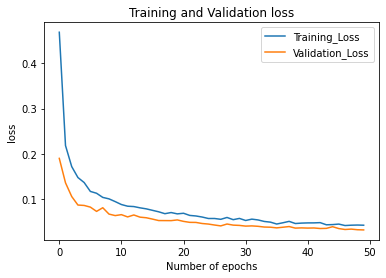

In [ ]:

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

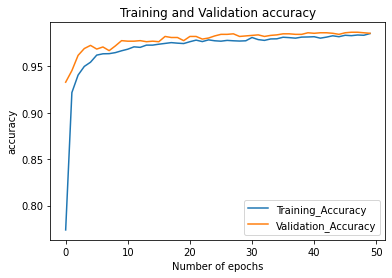

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

### Metrics

In [ ]:
#pred = model.predict(padded_docs_test)
#pred = pred.round()
cm = confusion_matrix(y_test, pred)
print(cm)

[[747  82]
 [ 51 883]]


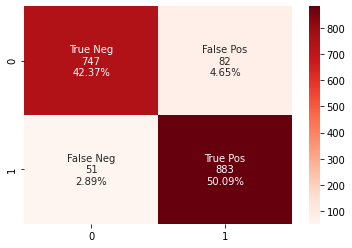

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')

In [ ]:
print(classification_report(y_test,pred))
print("Accuracy: ", accuracy_score(y_test, pred))
print("F1: ", f1_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred))
print("Recall: ", recall_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       829
           1       0.92      0.95      0.93       934

    accuracy                           0.92      1763
   macro avg       0.93      0.92      0.92      1763
weighted avg       0.92      0.92      0.92      1763

Accuracy:  0.9245604083947816
F1:  0.9299631384939443
Precision:  0.9150259067357513
Recall:  0.9453961456102784
